In [1]:
from orient_file import rotate
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = (20,10)

import cv2

from remove_table import remove

# Configs

In [2]:
class My_configs(dict):
    def __getattr__(self, attr):
        return self.get(attr)

    def __setattr__(self, key, value):
        self.__setitem__(key, value)

config = My_configs()

config.image1 = '1.jpeg'
config.image1_hor = (1, 15)
config.image1_vert = (15, 1)

config.image2 = '4.jpeg'
config.image2_hor = (1, 15)
config.image2_vert = (15, 1)


config.image3 = '5.jpeg'
config.image3_hor = (1, 15)
config.image3_vert = (15, 1)


config.image4 = '6.jpeg'
config.image4_hor = (1, 15)
config.image4_vert = (15, 1)

# First Part - Orienting the document

In [4]:
sinogram1, angle1, original_img1, rotated_img1, time1 = rotate(config.image1)
print(f'Done in {time1:.3f} sec')
sinogram2, angle2, original_img2, rotated_img2, time2 = rotate(config.image2) 
print(f'Done in {time2:.3f} sec')
sinogram3, angle3, original_img3, rotated_img3, time3 = rotate(config.image3) 
print(f'Done in {time3:.3f} sec')
sinogram4, angle4, original_img4, rotated_img4, time4 = rotate(config.image4) 
print(f'Done in {time4:.3f} sec')

/home/aslan/anaconda3/lib/python3.8/site-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Done in 2.158 sec
Done in 2.121 sec
Done in 2.188 sec
Done in 2.657 sec


In [5]:
def plot(original_img, rotated_img, angle):
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title('Original image')
    plt.subplot(1, 2, 2)
    plt.imshow(rotated_img)
    plt.title(f'rotated to {angle} degrees')
    plt.axis('off')

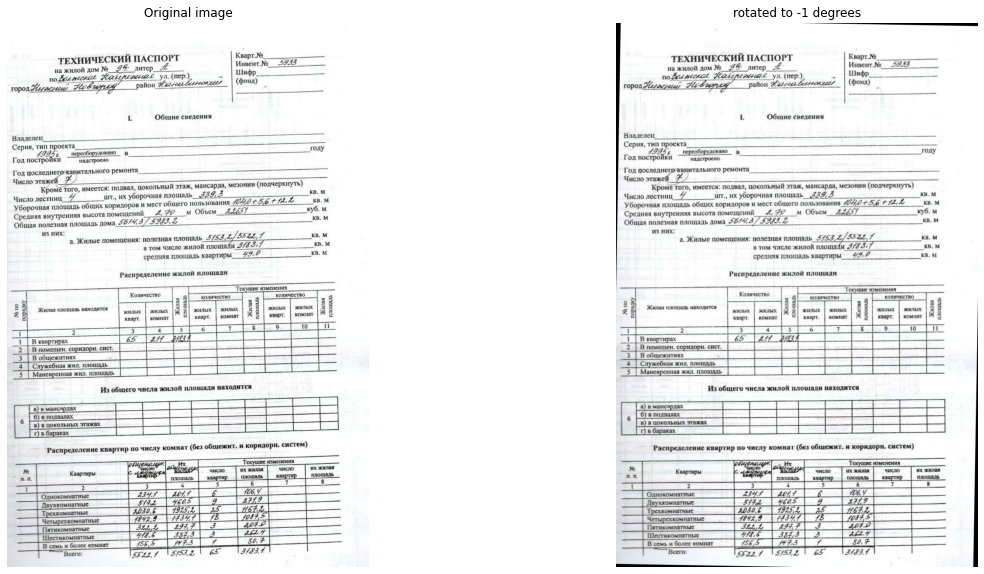

In [6]:
plot(original_img1, rotated_img1, angle1)

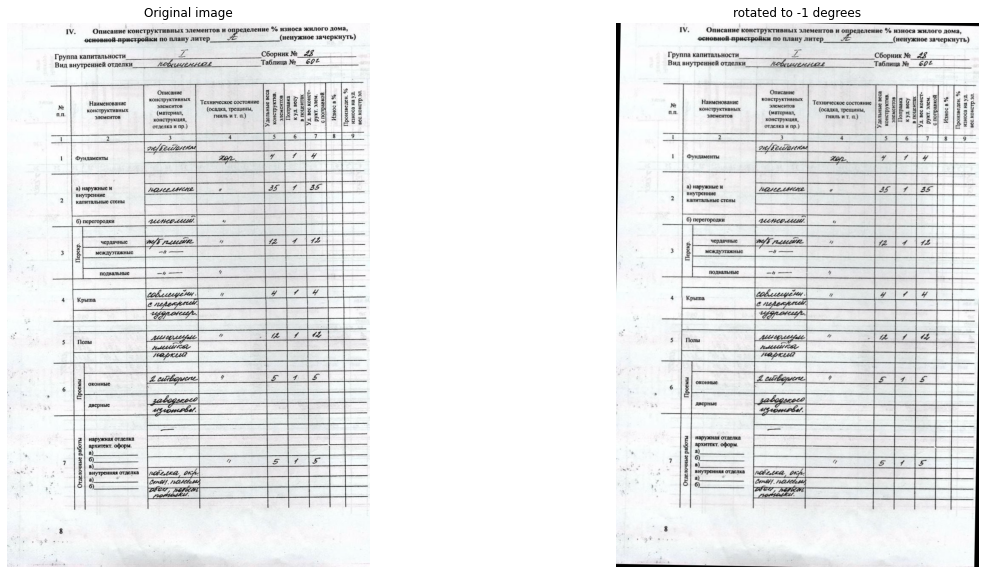

In [7]:
plot(original_img2, rotated_img2, angle2)

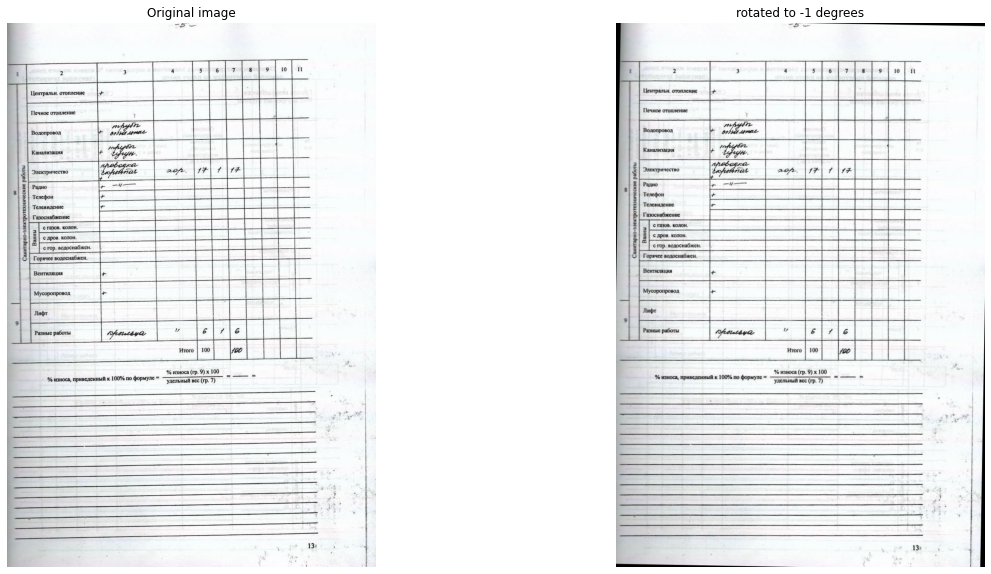

In [8]:
plot(original_img3, rotated_img3, angle3)

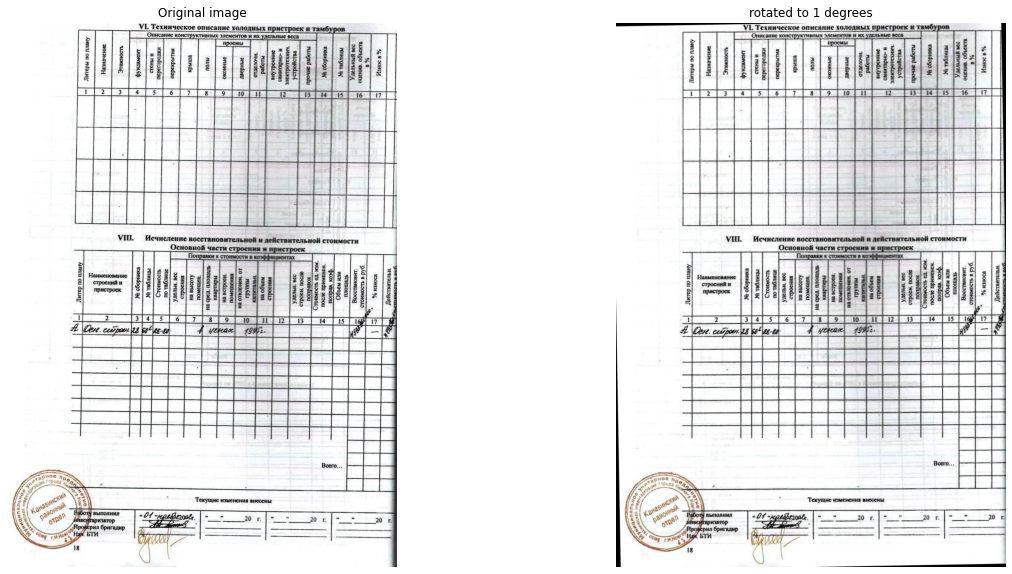

In [9]:
plot(original_img4, rotated_img4, angle4)

# Second part - remove the table

In [18]:
img1, table1, img_no_table1 = remove(rotated_img1, config.image1_hor, config.image1_vert)
img2, table2, img_no_table2 = remove(rotated_img2, config.image2_hor, config.image2_vert)
img3, table3, img_no_table3 = remove(rotated_img3, config.image3_hor, config.image3_vert)
img4, table4, img_no_table4 = remove(rotated_img4, config.image4_hor, config.image4_vert)

In [23]:
def plot_removed(rotated_img, table):
    plt.subplot(1, 3, 1)
    plt.imshow(rotated_img)
    plt.axis('off')
    plt.title('Rotated image')
    plt.subplot(1, 2, 2)
    plt.imshow(table)
    plt.title(f'table')
    plt.axis('off')
    
def draw_no_table(img_no_table):
    rcParams['figure.figsize'] = (20,10)

    plt.imshow(img_no_table, cmap = 'gray')
    plt.title(f'result')
    plt.axis('off')

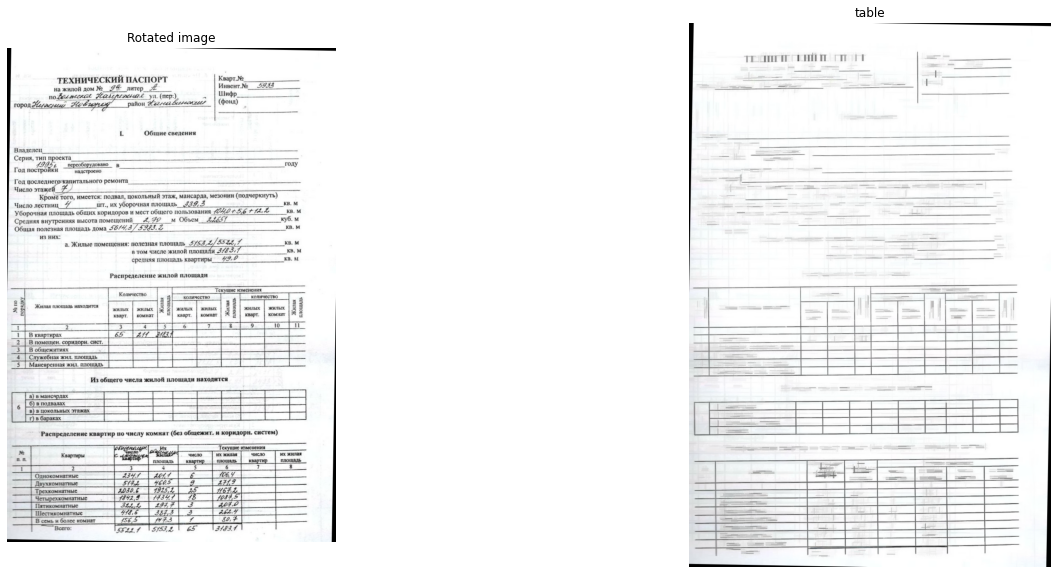

In [24]:
plot_removed(rotated_img1, table1)

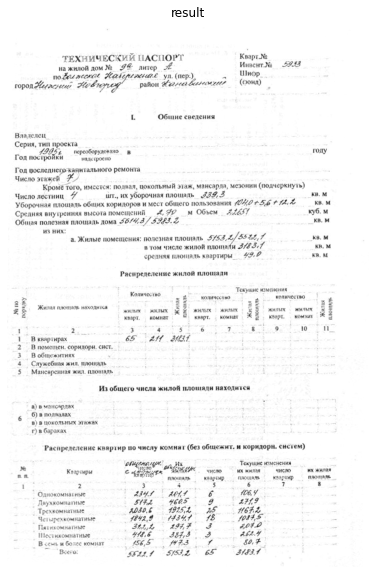

In [26]:
draw_no_table(img_no_table1)

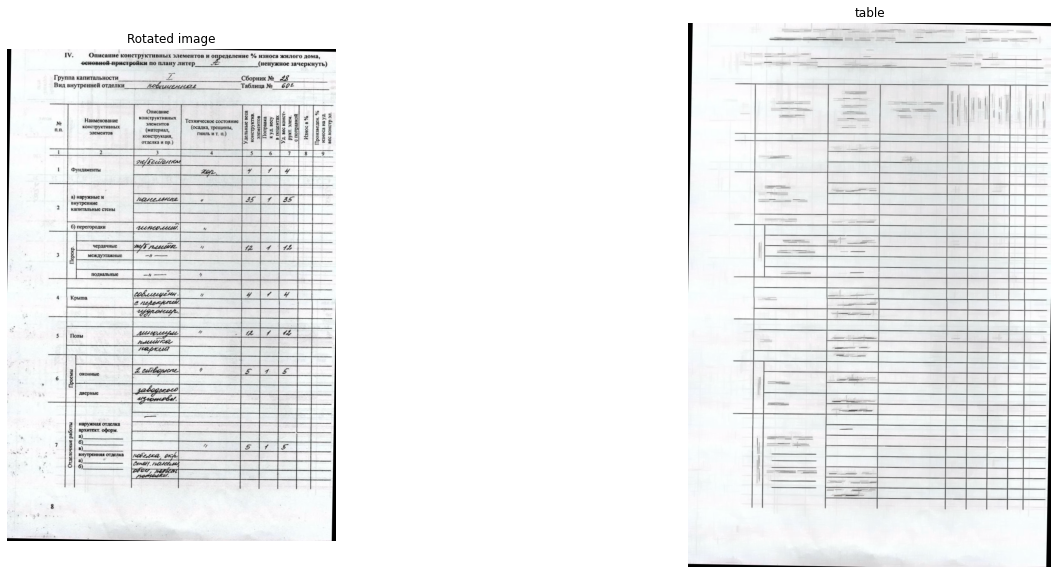

In [27]:
plot_removed(rotated_img2, table2)

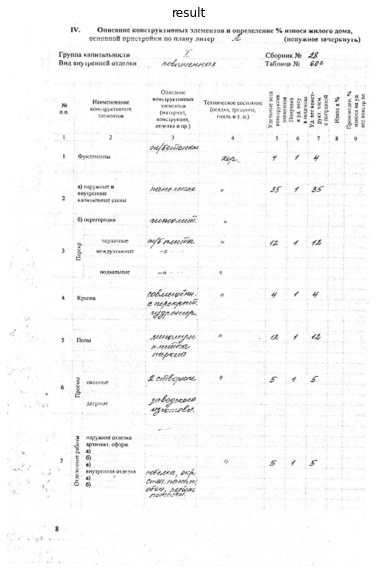

In [28]:
draw_no_table(img_no_table2)

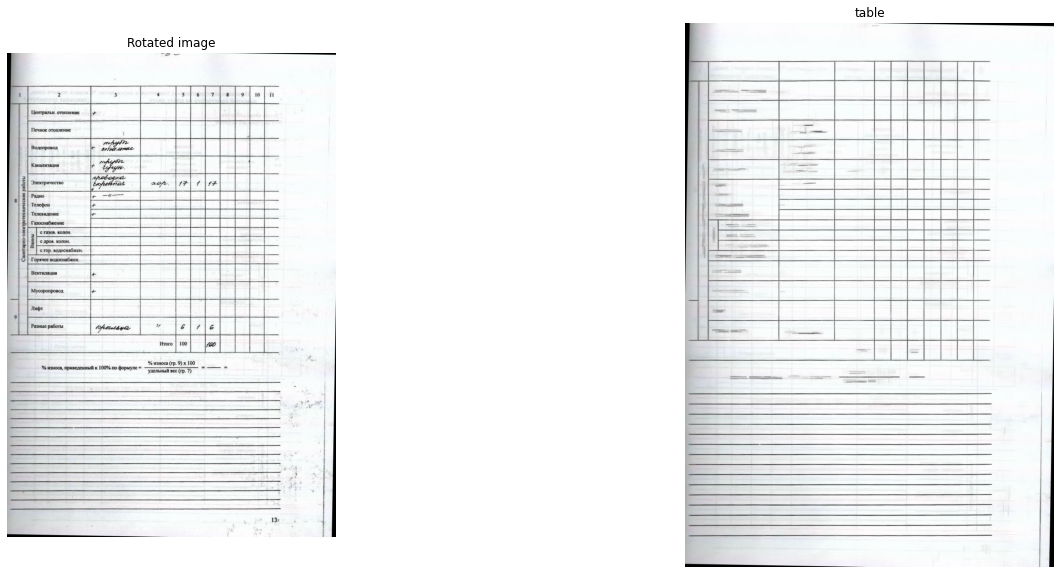

In [29]:
plot_removed(rotated_img3, table3)

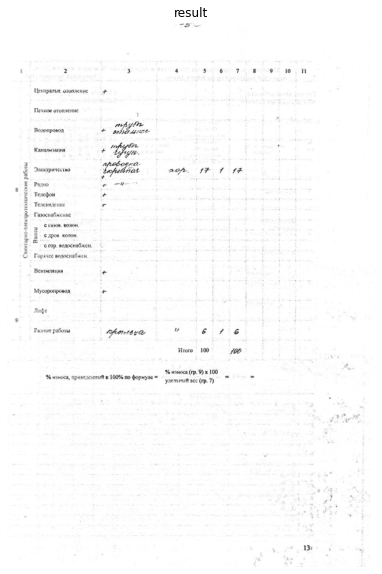

In [30]:
draw_no_table(img_no_table3)

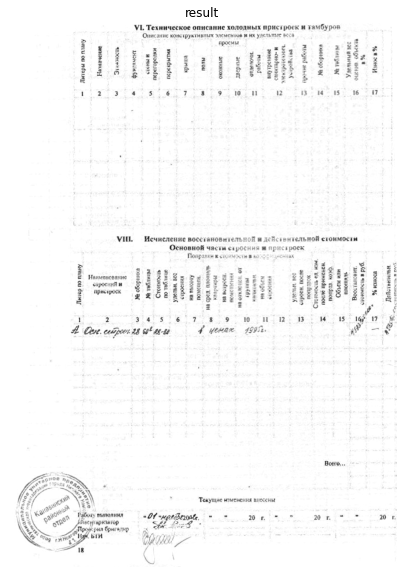

In [31]:
draw_no_table(img_no_table4)